In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [2]:
data = pd.read_csv('/content/Housing.csv')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


###**EDA**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


*null values check*

In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

*non-null invalid values check*

In [7]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

### ***Feature Engineering***


For features to be used in the model, it should be numerical than categorical. Hence, using ordinal encoding for binary and non-binary features.

In [8]:
binary = {'no': 0, 'yes':1}

data[['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning','prefarea']] = data[['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning','prefarea']].applymap(lambda x: binary.get(x, x))

In [9]:
furnished_encoding = {'unfurnished':0, 'semi-furnished':1, 'furnished':2}

data['furnishingstatus'] = data['furnishingstatus'].map(lambda x : furnished_encoding.get(x,x))

*Using heatmap to visualize the correlations*

To simplify this, based on correlations, can conclude the features

* Area - 0.54
* Number of Bathrooms - 0.52
* Airconditioning - 0.45
* Stories - 0.42
* Parking - 0.38
* Number of Bedrooms - 0.37
* Mainroad - 0.3
* Prefarea - 0.3
* FurnishingStatus - 0.3
---
* Guestroom
* Heating
* Basement



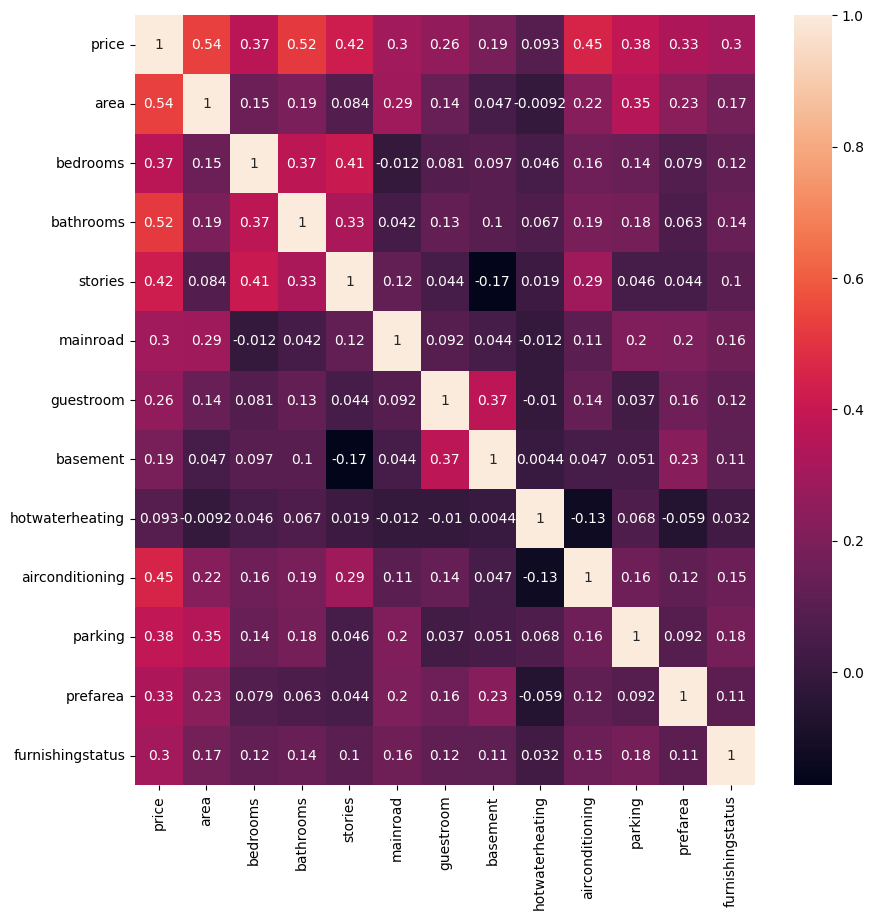

In [12]:
sns.heatmap(data.corr(), annot = True)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

***Plot the features with low correlation value to cross-check the interdependence between the features and target variable***

---

Target variable (Price) has Direct Relationship with all these features. As the availability of guestrooms, heating system and basement increases the price as well



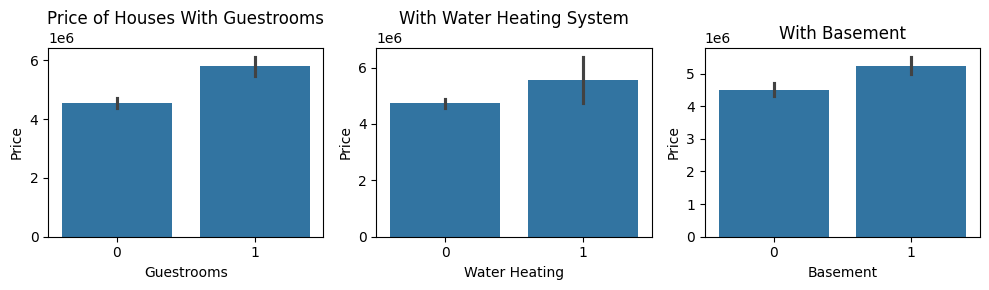

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(10,3))
sns.barplot(data = data, x = 'guestroom', y = 'price', ax = ax1)
ax1.set_xlabel('Guestrooms')
ax1.set_ylabel('Price')
ax1.set_title('Price of Houses With Guestrooms')

sns.barplot(data = data, x = 'hotwaterheating', y = 'price', ax = ax2)
ax2.set_xlabel('Water Heating')
ax2.set_ylabel('Price')
ax2.set_title('With Water Heating System')

sns.barplot(data = data, x = 'basement', y = 'price', ax = ax3)
ax3.set_xlabel('Basement')
ax3.set_ylabel('Price')
ax3.set_title('With Basement')


plt.tight_layout()
plt.show()

***Separate the features and label(Price)***



In [14]:
#Features
X = data.drop(labels=['price'],axis=1)

In [15]:
#Label/Target Variable
Y = data['price']

***Split the features and label data into training and testing***

In [16]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2,random_state=0)

In [17]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
542,3620,2,1,1,1,0,0,0,0,0,0,0
496,4000,2,1,1,1,0,0,0,0,0,0,0
484,3040,2,1,1,0,0,0,0,0,0,0,0
507,3600,2,1,1,1,0,0,0,0,0,0,0
252,9860,3,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
70,4000,3,2,2,1,0,1,0,1,0,1,1
277,10360,2,1,1,1,0,0,0,0,1,1,1
9,5750,3,2,4,1,1,0,0,1,1,1,0
359,3600,3,1,1,1,0,0,0,0,1,0,0


*Perform further feature engineering using* ***Mutual Information***

Using mutual information scores, top 5 features are:


*   Area
*   Number of Bedrooms
*   Furnishing Status
*   Number of Bathrooms
*   Stories



In [18]:
mi_scores = mutual_info_regression(X_train, Y_train)
mutual_info = pd.Series(mi_scores)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

area               0.18
bedrooms           0.14
furnishingstatus   0.13
bathrooms          0.13
stories            0.12
parking            0.10
airconditioning    0.10
prefarea           0.09
guestroom          0.08
mainroad           0.08
basement           0.05
hotwaterheating    0.02
dtype: float64

Using a percentile, allows to select a certain percentage of features based on their scores. This approach is more flexible and can be useful to include a broader range of features without specifying each one individually.

More control over which features
 - direct selection based on scores.

More automated over subset of features
 - percentile approach can be more suitable.

In [19]:
#Using percentile to get the top features
top_features = SelectPercentile(mutual_info_regression, percentile = 75)
top_features.fit(X_train, Y_train)

SelectPercentile(percentile=75,
                 score_func=<function mutual_info_regression at 0x7994971a4a60>)

In [20]:
X_train.columns[top_features.get_support()]

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'guestroom',
       'airconditioning', 'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# **Linear Regression**


## **Simple Linear Regression**







*Processing the feature and target variable. Normalizing the dataset to improve the accuracy of model*

In [123]:
#Using single feature and target variable

x = data['area']
y = data['price']


In [124]:
#Normalizing the dataset using MinMax Method
#Using Sklearn library for MinMaxScaler normalization

area_data = np.array(x).reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
area_normalized = min_max_scaler.fit_transform(area_data)
x_normalized = pd.Series(area_normalized.flatten())

In [125]:
price_data = np.array(y).reshape(-1, 1)
price_normalized = min_max_scaler.fit_transform(price_data)
y_normalized = pd.Series(price_normalized.flatten())

In [126]:
#Split the data in train and test datasets with test size of 80-20

x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_normalized, test_size=0.2,random_state=0)
x_train

542   0.14
496   0.16
484   0.10
507   0.13
252   0.56
      ... 
70    0.16
277   0.60
9     0.28
359   0.13
192   0.34
Length: 436, dtype: float64

## **Implementation from Scratch**

Implementation of simple linear regression from Scratch using pandas and numpy. Using one feature to predict the continuous target variable

>  y = mx + c

> *Price = Weight.Area + bias*

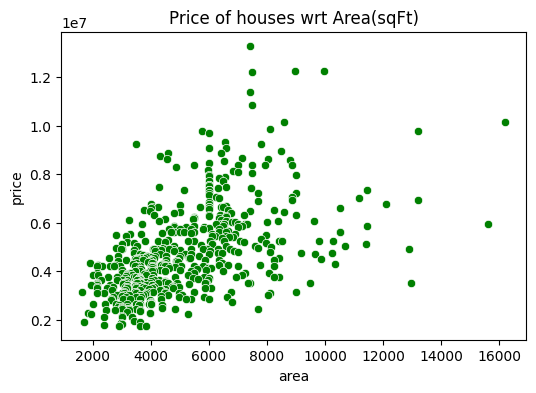

In [127]:
#Plot the scatter plot of area vs price to visualize the dataset
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x="area", y="price", color = 'green')
plt.title('Price of houses wrt Area(sqFt)')
plt.show()

### *Implementing the Predict Function*
The function using the line-equation y = mx + c to predict y

Will calculate the weight and bias later

In [57]:
def predict(w, x, b):
  price = w*x + b
  return price

### *Cost Function*

Using ***MSE(Mean Squared Error)*** cost function(loss function) to optimize the weights. Goal is to minimize the error as much as possible

> **MSE = 1/N (∑ yᵢ - Y ) ^ 2**

> **MSE = 1/N (∑ yᵢ - (wxᵢ + b) ) ^ 2**

yᵢ - Actual value

Y - Predicted value

In [58]:
def cost_function(x, y, w, b):
    total_error = 0.0
    N = len(x)

    for i in range(N):
        total_error += (y.iloc[i] - (w * x.iloc[i] + b))**2

    return total_error / N

### Gradient Descent

To minimize MSE, calculate gradient of cost function. Update the weight and bias using the partial derivatives.

> **w = w - dw*lr**

>> dw = 1/N (∑ -2xᵢ (yᵢ - (wxᵢ + b)))

> **b = b - db*lr**

>> db = 1/N (∑ -2 (yᵢ - (wxᵢ + b)))


lr - learning rate

In [59]:
def gradient_descent(x, y, lr, w, b):

  #Define the variables for gradient
  dw = 0
  db = 0

  N = len(x)
  for i in range(N):

    #Calculate the partial derivates for weight and bias using the current weight and bias

    #dw = -2/N(∑xi(yi−(mxi+b)))
    dw += - (2 / N) * x.iloc[i] * (y.iloc[i] - (w * x.iloc[i] + b))

    #db = -2/N(∑(yi−(mxi+b))
    db += - (2 / N) * (y.iloc[i] - (w * x.iloc[i] + b))

  #Update the weight and bias
  # w = w - lr*dw
  w -= lr * dw
  # b = b
  b -= lr * db

  return w, b

### *Train Function*

The function iterates through the training process for the specified number of epochs. In each epoch, it updates the weight and bias of the model using the gradient descent algorithm (`gradient_descent` function) and calculates the cost (mean squared error) using the `cost_function`. The function stores the cost values for each epoch in a list.

After training, the function returns the final weight and bias

In [60]:
def train(x, y,  w, b, lr, epochs):
  cost = []

  for i in range(epochs):
    w, b = gradient_descent(x, y, lr, w, b)
    cost_value = cost_function(x, y, w, b)
    cost.append(cost_value)
    if i % 10 == 0:
      print(f"Epoch:{i}, Weight:{w}, Bias:{b}, Cost:{cost_value}")
  return w, b


*Experimented with different combinations of epochs and learning rates for their linear regression model, which did not converge initially. After **normalizing** the data, they achieved optimal results with an **MSE of 0.014** and a **cost of 0.0199** using **100 epochs** and a **learning rate of 0.5**.*

In [ ]:
#weight, bias = 0,0
#mse = 0.0
#epochs_range = [10000, 15000, 20000, 25000, 30000, 35000, 40000]
#lr_range = [0.00000000000000000001, 0.0000000000000000001, 0.00000000000000001, 0.00000000000000001, 0.0000000000000001, 0.000000000000001, 0.00000000000001, 0.00000000000001, 0.000000000001]

epochs_range = [50, 100, 150, 200]
lr_range = [0.5]

for e in epochs_range:
  for l in lr_range:
    w, b = train(x_train, y_train, weight, bias, l, e)
    mse = cost_function(x_test, y_test, w, b)
    print(f"Epoch: {e}, Lr: {l}, MSE: {mse}")



In [131]:
weight, bias = 0,0
mse = 0.0
epochs = 100
lr = 0.5

#Training the model with specified epochs and learning rate
#Returns the weight and bias, with the cost of training (which depicts is the model actually learning from the dataset)
w, b= train(x_train, y_train, weight, bias, lr, epochs)

#Use weight and bias from train method to evaluate the model
#Get the mean square error of model on test dataset
mse = cost_function(x_test, y_test, w, b)
print(f"MSE: {mse}")


Epoch:0, Weight:0.07599773397457024, Bias:0.26213291631915425, Cost:0.02581357458854218
Epoch:10, Weight:0.17024312113600798, Bias:0.22330570241258257, Cost:0.023550225943191474
Epoch:20, Weight:0.2499193428624262, Bias:0.20373224553780075, Cost:0.02221299949096341
Epoch:30, Weight:0.3147793891193797, Bias:0.18779856682164042, Cost:0.02132686017817465
Epoch:40, Weight:0.36757839877747933, Bias:0.17482783206313085, Cost:0.02073964259781538
Epoch:50, Weight:0.410559179423735, Bias:0.16426906762632967, Cost:0.020350511361105227
Epoch:60, Weight:0.44554747782031573, Bias:0.15567375606476108, Cost:0.0200926459217038
Epoch:70, Weight:0.47402953436469397, Bias:0.14867678390171732, Cost:0.019921766335166766
Epoch:80, Weight:0.4972152159260596, Bias:0.1429809322621666, Cost:0.019808529628600496
Epoch:90, Weight:0.5160894088280871, Bias:0.1383442515460239, Cost:0.01973349110601378
MSE: 0.014839442993103816


### ***Testing the model***

By predicting the price of the max area in the dataset

*As the dataset was normalized, hence, reversing the process to get the value predicted*

In [137]:
print("Actual Price of House with Area = 16200, ", data[data['area'] == 16200]['price'])

predicted = predict(w, 0.9999999999999998, b)  #Max Area. Normalized Value of 16200
predicted_price_normalized = np.array([[predicted]])
predicted_price = min_max_scaler.inverse_transform(predicted_price_normalized)
print("Predicte Price of House with Area = 16200,", predicted_price[0][0])

Actual Price of House with Area = 16200,  7    10150000
Name: price, dtype: int64
Predicte Price of House with Area = 16200, 9430391.595296564


### ***Plot dataset with the best fit line***

In [138]:
#Get the predicted prices

predicted_prices_normalized = []
for i in x_normalized:
    predicted_price_normalized = predict(w, i, b)
    predicted_prices_normalized.append(predicted_price_normalized)

#Reverse the normalization
predicted_prices = min_max_scaler.inverse_transform(np.array(predicted_prices_normalized).reshape(-1, 1)).flatten()



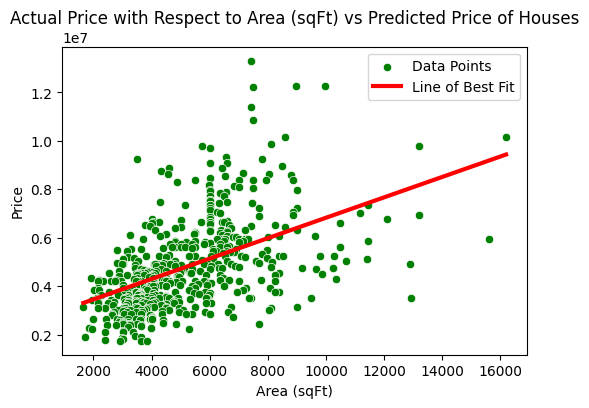

In [140]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=y, color='green', label = 'Data Points')

sns.lineplot(x=x, y=predicted_prices, color='red', label = 'Line of Best Fit', linewidth = 3)

plt.title('Actual Price with Respect to Area (sqFt) vs Predicted Price of Houses')
plt.xlabel('Area (sqFt)')
plt.ylabel('Price')
plt.legend()
plt.show()


## **Implementation using Scikit Library**

Using one feature to predict the continuous target variable

>  y = mx + c

> *Price = Weight.Area + bias*

In [148]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

predicted = linear_regression_model.predict(x_test.values.reshape(-1, 1))

print("MSE:", mean_squared_error(y_test, predicted))

MSE: 0.014974774623834538


In [165]:
#Get the predicted prices

predicted_prices_normalized = []

predicted_prices_normalized = linear_regression_model.predict(x_normalized.values.reshape(-1, 1))

#Reverse the normalization
predicted_prices = min_max_scaler.inverse_transform(np.array(predicted_prices_normalized).reshape(-1, 1)).flatten()


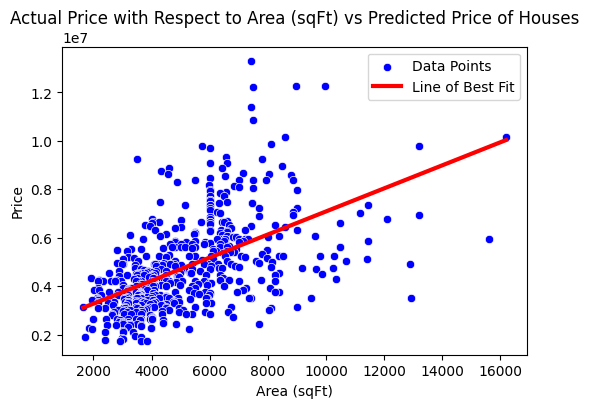

In [167]:


plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=y, color='blue', label='Data Points')
sns.lineplot(x=x, y=predicted_prices.flatten(), color='red', label='Line of Best Fit', linewidth=3)

plt.title('Actual Price with Respect to Area (sqFt) vs Predicted Price of Houses')
plt.xlabel('Area (sqFt)')
plt.ylabel('Price')
plt.legend()
plt.show()
